In [20]:
def indian_shruti_major_scale(tonic_frequency):
    ratios = [
        (1, 1),  # Sa (Shadja)
        (9, 8),  # Re (Rishabh)
        (5, 4),  # Ga (Gandhar)
        (4, 3),  # Ma (Madhyam)
        (3, 2),  # Pa (Pancham)
        (27, 16),  # Dha (Dhaivat)
        (15, 8),  # Ni (Nishad)
        (2, 1),  # Sa (Shadja) upper octave
    ]

    scale_frequencies = [tonic_frequency * ratio_numerator / ratio_denominator for ratio_numerator, ratio_denominator in ratios]
    
    return scale_frequencies

tonic_frequency = 240  # You can change this to any desired starting frequency
scale = indian_shruti_major_scale(tonic_frequency)

print("Indian Shruti Major Scale frequencies:")
for i, freq in enumerate(scale, start=1):
    print(f"Note {i}: {freq:.2f} Hz")


Indian Shruti Major Scale frequencies:
Note 1: 240.00 Hz
Note 2: 270.00 Hz
Note 3: 300.00 Hz
Note 4: 320.00 Hz
Note 5: 360.00 Hz
Note 6: 405.00 Hz
Note 7: 450.00 Hz
Note 8: 480.00 Hz


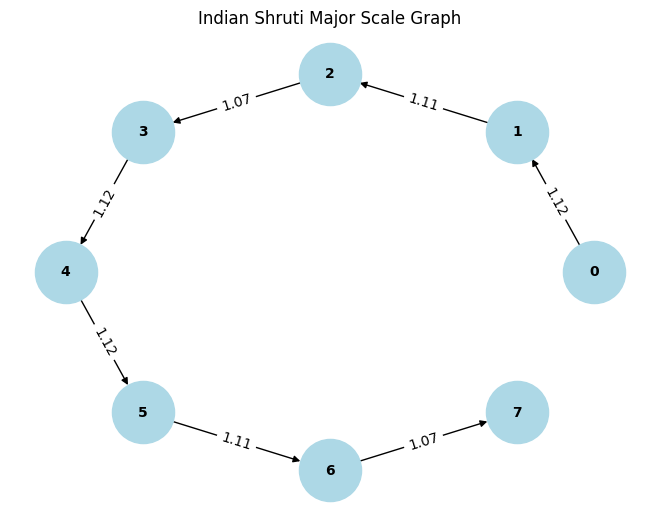

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def indian_shruti_major_scale_graph(tonic_frequency):
    ratios = [
        (1, 1),  # Sa (Shadja)
        (9, 8),  # Re (Rishabh)
        (5, 4),  # Ga (Gandhar)
        (4, 3),  # Ma (Madhyam)
        (3, 2),  # Pa (Pancham)
        (27, 16),  # Dha (Dhaivat)
        (15, 8),  # Ni (Nishad)
        (2, 1),  # Sa (Shadja) upper octave
    ]
    
    note_labels = ['Sa', 'Re', 'Ga', 'Ma', 'Pa', 'Dha', 'Ni', 'Sa']
    scale_frequencies = [tonic_frequency * ratio_numerator / ratio_denominator for ratio_numerator, ratio_denominator in ratios]

    G = nx.DiGraph()

    for i, (note_label, frequency) in enumerate(zip(note_labels, scale_frequencies)):
        G.add_node(i, label=note_label, frequency=frequency)
        if i > 0:
            G.add_edge(i-1, i, weight=scale_frequencies[i] / scale_frequencies[i-1])

    return G

def draw_graph(G):
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

    labels = nx.get_edge_attributes(G, 'weight')
    for key, value in labels.items():
        labels[key] = f"{value:.2f}"

    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)

    plt.title("Indian Shruti Major Scale Graph")
    plt.show()

tonic_frequency = 240
G = indian_shruti_major_scale_graph(tonic_frequency)
draw_graph(G)


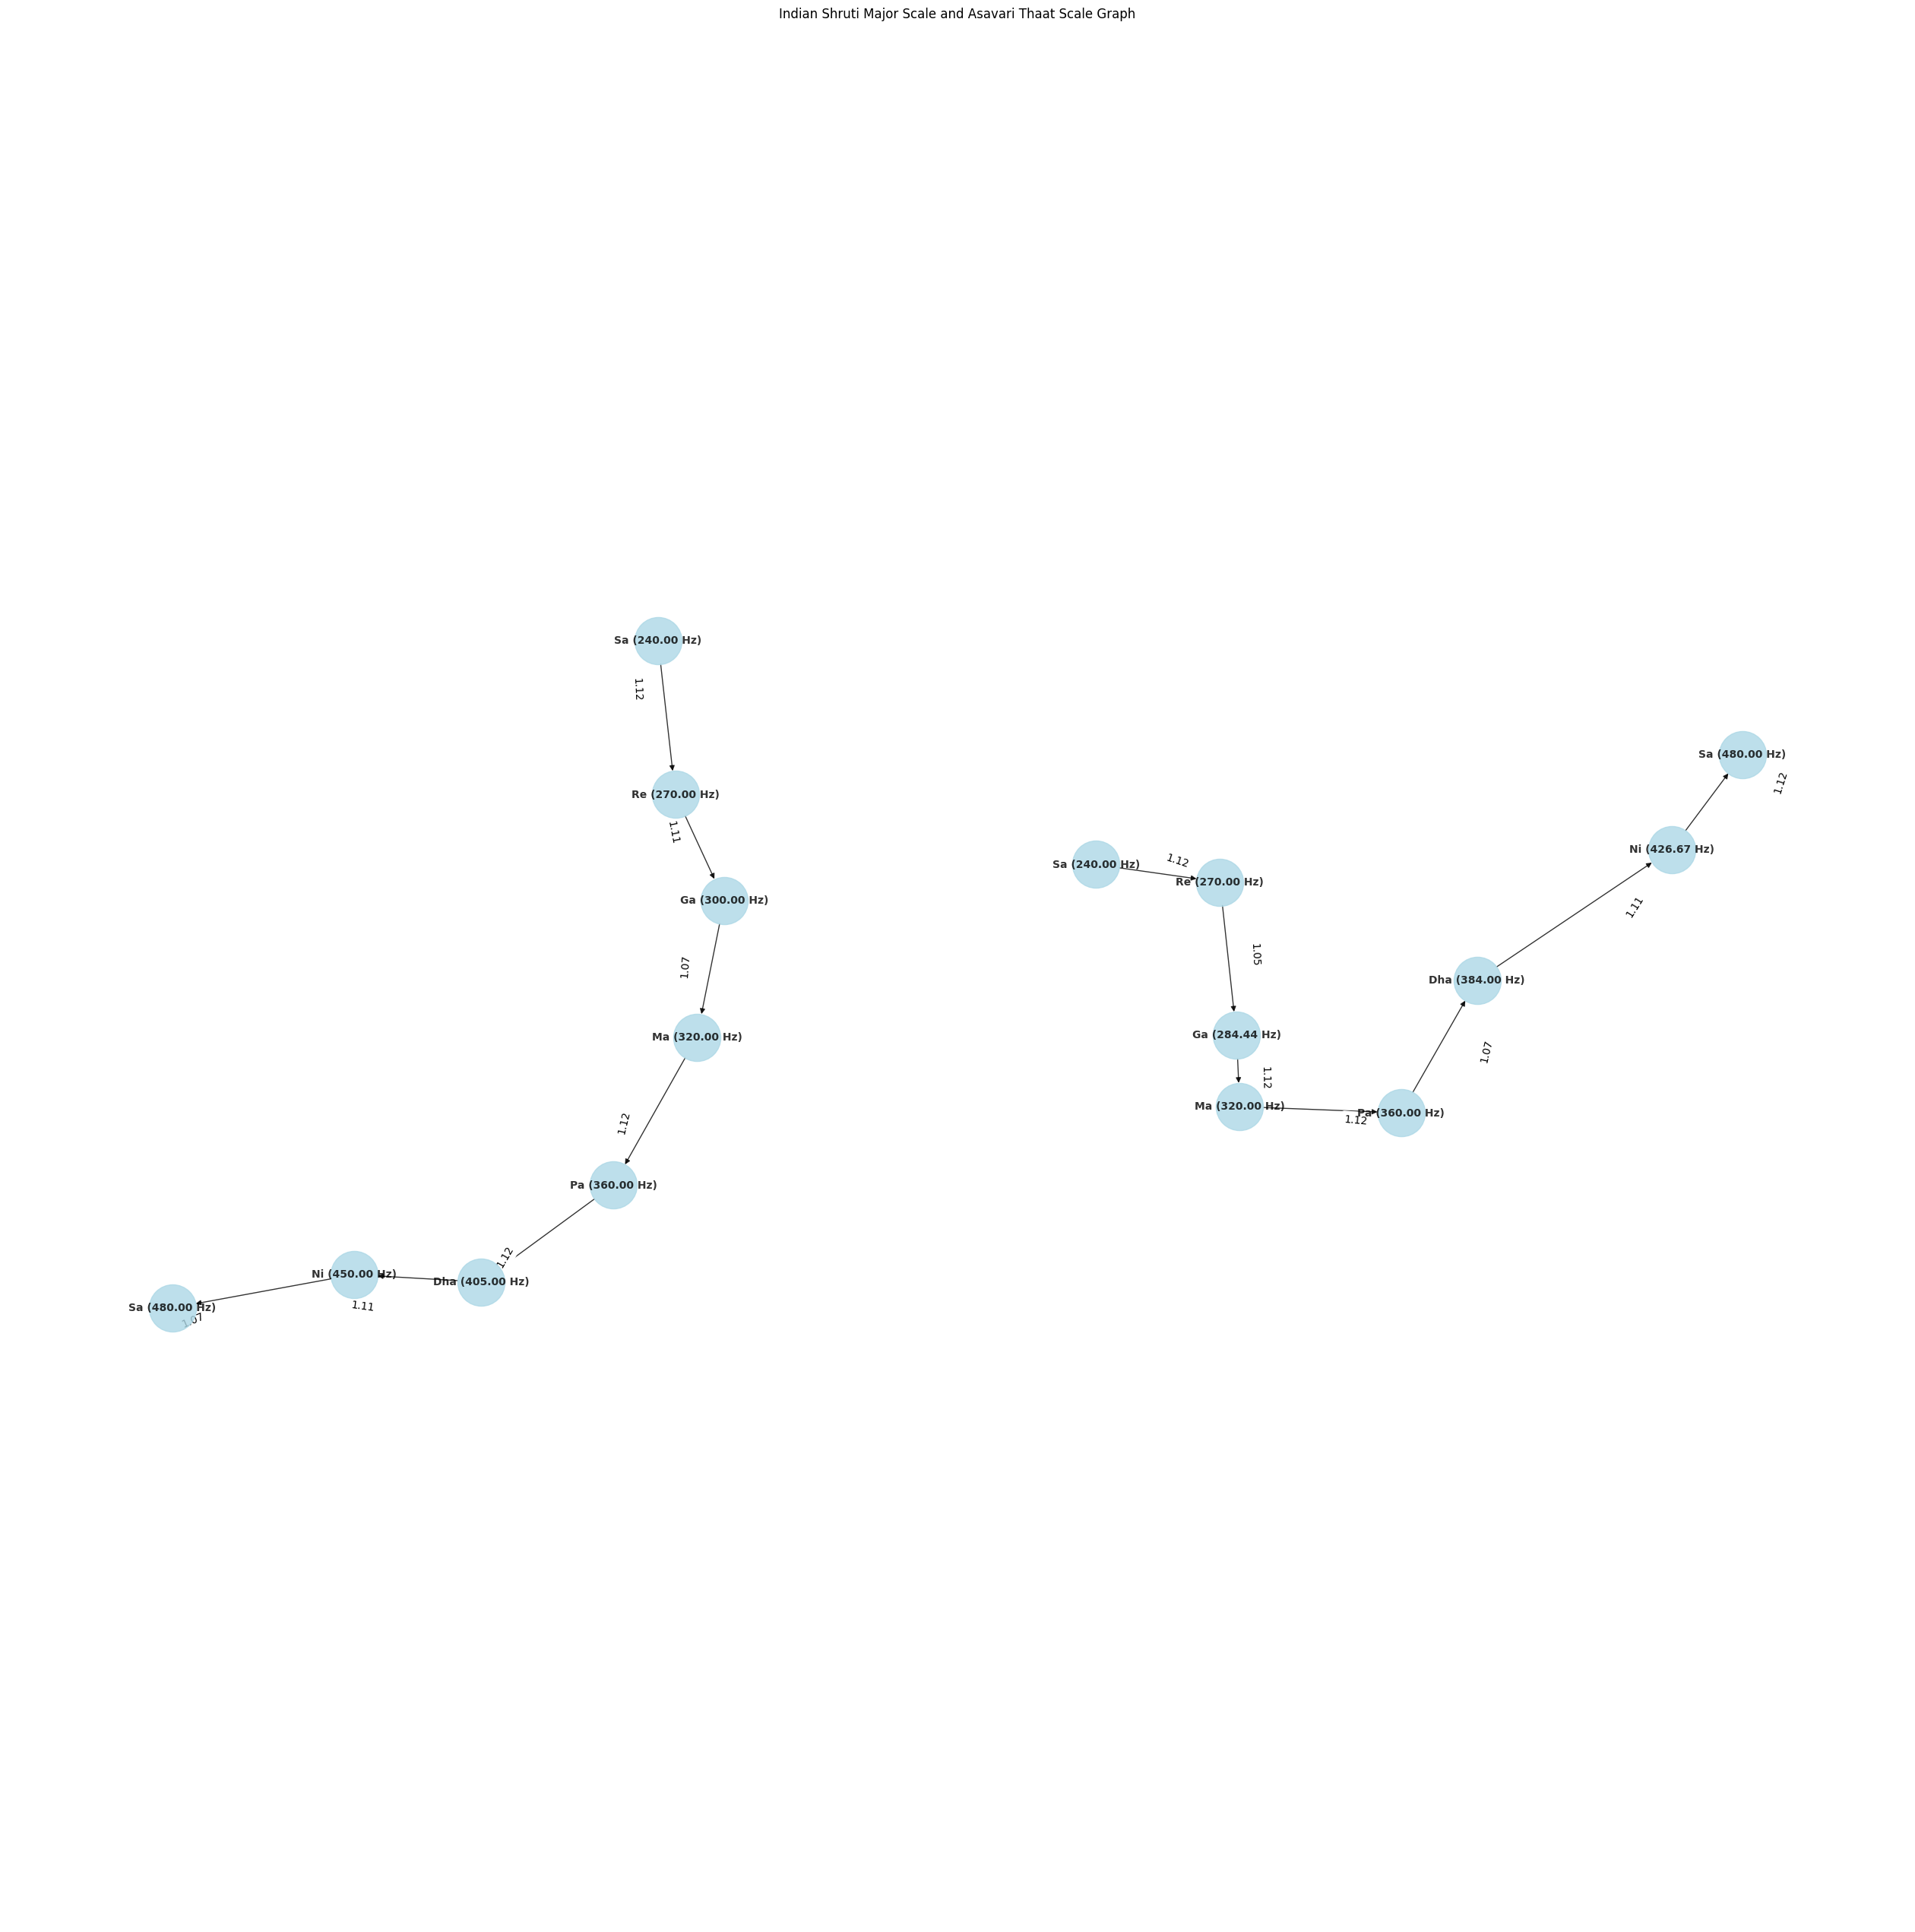

In [22]:
def add_asavari_thaat_scale_to_graph(G, tonic_frequency):
    ratios = [
        (1, 1),  # Sa (Shadja)
        (9, 8),  # Re (Rishabh)
        (32, 27),  # Ga (Gandhar)
        (4, 3),  # Ma (Madhyam)
        (3, 2),  # Pa (Pancham)
        (8, 5),  # Dha (Dhaivat)
        (16, 9),  # Ni (Nishad)
        (2, 1),  # Sa (Shadja) upper octave
    ]
    
    note_labels = ['Sa', 'Re', 'Ga', 'Ma', 'Pa', 'Dha', 'Ni', 'Sa']
    scale_frequencies = [tonic_frequency * ratio_numerator / ratio_denominator for ratio_numerator, ratio_denominator in ratios]

    offset = len(G.nodes)
    for i, (note_label, frequency) in enumerate(zip(note_labels, scale_frequencies)):
        G.add_node(offset + i, label=note_label, frequency=frequency)
        if i > 0:
            G.add_edge(offset + i - 1, offset + i, weight=scale_frequencies[i] / scale_frequencies[i - 1])

    return G

tonic_frequency = 240
G = indian_shruti_major_scale_graph(tonic_frequency)
G = add_asavari_thaat_scale_to_graph(G, tonic_frequency)
draw_graph(G)


In [21]:
def asavari_thaat_scale(tonic_frequency):
    ratios = [
        (1, 1),  # Sa (Shadja)
        (9, 8),  # Re (Rishabh)
        (32, 27),  # Ga (Gandhar)
        (4, 3),  # Ma (Madhyam)
        (3, 2),  # Pa (Pancham)
        (8, 5),  # Dha (Dhaivat)
        (16, 9),  # Ni (Nishad)
        (2, 1),  # Sa (Shadja) upper octave
    ]

    scale_frequencies = [tonic_frequency * ratio_numerator / ratio_denominator for ratio_numerator, ratio_denominator in ratios]
    
    return scale_frequencies

tonic_frequency = 240  # You can change this to any desired starting frequency
scale = asavari_thaat_scale(tonic_frequency)

print("Asavari Thaat Scale frequencies:")
for i, freq in enumerate(scale, start=1):
    print(f"Note {i}: {freq:.2f} Hz")


Asavari Thaat Scale frequencies:
Note 1: 240.00 Hz
Note 2: 270.00 Hz
Note 3: 284.44 Hz
Note 4: 320.00 Hz
Note 5: 360.00 Hz
Note 6: 384.00 Hz
Note 7: 426.67 Hz
Note 8: 480.00 Hz


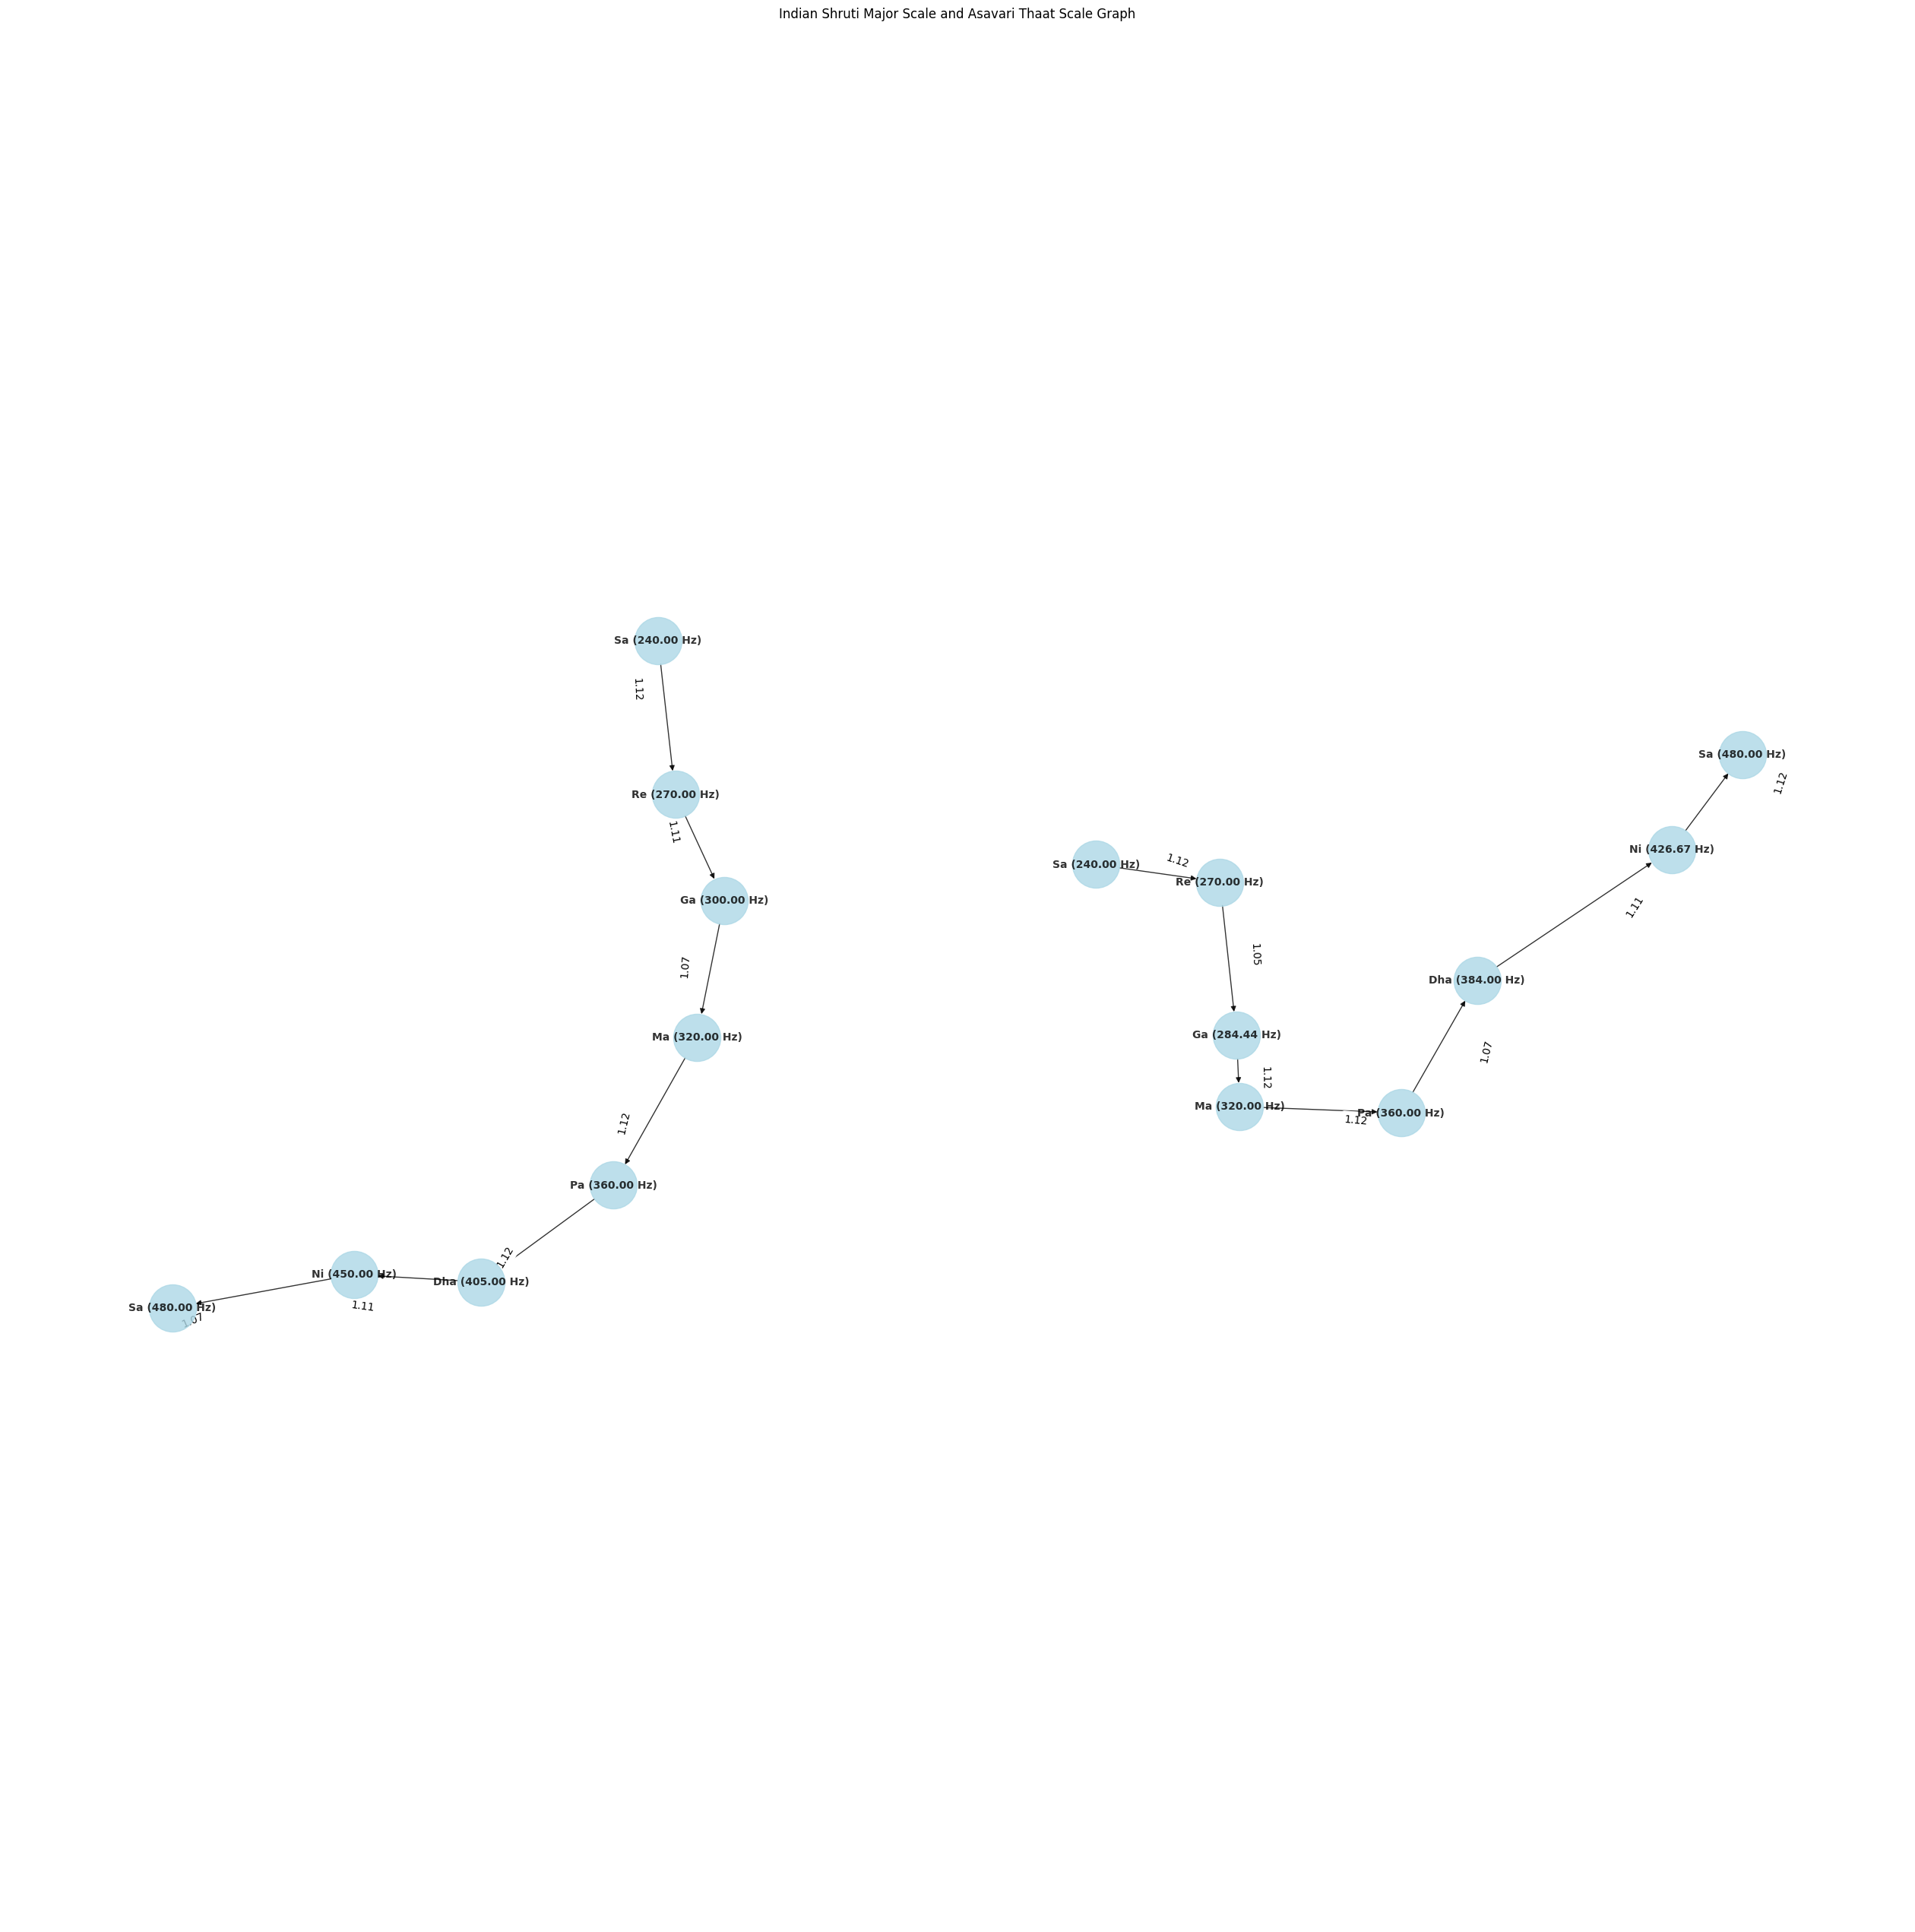

In [19]:
import numpy as np

def edge_label_pos(pos, scale=1.1):
    new_pos = {}
    for key, value in pos.items():
        new_pos[key] = value * scale
    return new_pos

def draw_graph(G):
    plt.figure(figsize=(25, 25))  # Increase the figure size

    pos = nx.spring_layout(G, seed=42)  # Changed layout for better readability
    edge_pos = edge_label_pos(pos)

    # Get node labels with name and frequency
    node_labels = {}
    for node, data in G.nodes(data=True):
        label = f"{data['label']} ({data['frequency']:.2f} Hz)"
        node_labels[node] = label

    nx.draw(G, pos, labels=node_labels, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True, alpha=0.8)

    # Get edge labels with frequency ratios
    edge_labels = nx.get_edge_attributes(G, 'weight')
    for key, value in edge_labels.items():
        edge_labels[key] = f"{value:.2f}"

    nx.draw_networkx_edge_labels(G, edge_pos, edge_labels=edge_labels, font_size=10)

    plt.title("Indian Shruti Major Scale and Asavari Thaat Scale Graph")
    plt.axis("equal")  # Ensure the aspect ratio is equal to avoid distortion
    plt.show()

tonic_frequency = 240
G = indian_shruti_major_scale_graph(tonic_frequency)
G = add_asavari_thaat_scale_to_graph(G, tonic_frequency)
draw_graph(G)
